In [13]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

#path='skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv'
df=pd.read_csv("hmnist_28_28_RGB.csv")
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [14]:
fractions=np.array([0.5,0.5])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

print(len(train_set))
print(len(test_set))


5007
5008


In [15]:
df.label.unique()


array([4, 2, 5, 6, 0, 3, 1], dtype=int64)

In [16]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [17]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [18]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

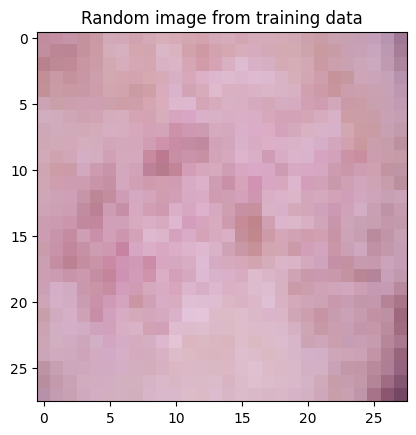

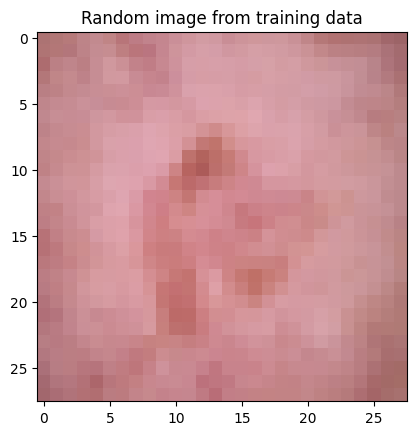

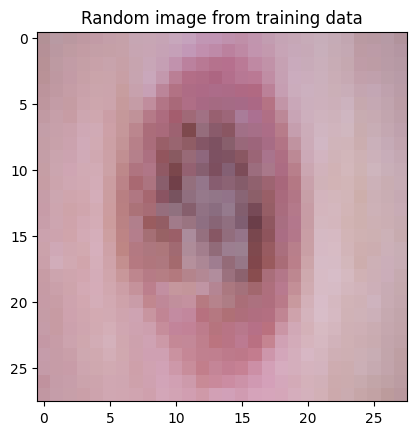

In [19]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, UpSampling2D, BatchNormalization, LeakyReLU, MaxPool2D


# Example generator model
generator = Sequential()
generator.add(Dense(128, input_dim=100, activation='relu'))
generator.add(Dense(784, activation='sigmoid'))
generator.add(Dense(28*28*3))
generator.add(Reshape((28, 28, 3)))

# Discriminator model
discriminator = Sequential()

discriminator.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
discriminator.add(MaxPool2D(pool_size=(2, 2)))
discriminator.add(tf.keras.layers.BatchNormalization())

discriminator.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
discriminator.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

discriminator.add(MaxPool2D(pool_size=(2, 2)))
discriminator.add(tf.keras.layers.BatchNormalization())

discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
discriminator.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

discriminator.add(Flatten())
discriminator.add(tf.keras.layers.Dropout(0.2))
discriminator.add(Dense(256, activation='relu'))

discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(tf.keras.layers.Dropout(0.2))
discriminator.add(Dense(128, activation='relu'))

discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(Dense(64, activation='relu'))

discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(tf.keras.layers.Dropout(0.2))
discriminator.add(Dense(32, activation='relu'))

discriminator.add(tf.keras.layers.BatchNormalization())
discriminator.add(Dense(1, activation='sigmoid'))  # Binary classification (real or fake)


# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                  │ (None, 28, 28, 16)            │         448 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 14, 14, 16)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_6              │ (None, 14, 14, 16)            │          64 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_6 (Conv2D)                  │ (None, 12, 12, 32)            │       4,640 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)                  │ (None, 10, 10, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 5, 5, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_7              │ (None, 5, 5, 64)              │         256 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_8 (Conv2D)                  │ (None, 3, 3, 128)             │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)                  │ (None, 1, 1, 256)             │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_11 (Dense)                   │ (None, 256)                   │      65,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_8              │ (None, 256)                   │       1,024 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_4 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_12 (Dense)                   │ (None, 128)                   │      32,896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_9              │ (None, 128)                   │         512 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_13 (Dense)                   │ (None, 64)                    │       8,256 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ batch_normalization_10             │ (None, 64)                    │         256 │
│ (BatchNormalization)               │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ (None, 64)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_14 (Dense)                   │ (None, 32)                    │       2,080 │
├────

 Total params: 503,905 (1.92 MB)

 Trainable params: 502,785 (1.92 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [21]:
# GAN model
from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adam  # Import the Adam optimizer

discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan_model = Model(gan_input, gan_output)

# Compile the GAN model
gan_model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')


In [22]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

x_train_augmented = np.array(x_train, dtype=np.uint8)

def save_generated_images(epoch, generator):
    noise = np.random.normal(0, 1, (9, 100))  # Generate 9 random noise vectors
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 10))
    for i in range(7):  # Adjust the loop range to match the number of classes
        plt.subplot(3, 3, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.title(classes[i][1], fontsize=10)  # Add class label as the title
        plt.axis('off')

    plt.savefig(f'generated_images_epoch_{epoch}.png')
    plt.show()  # Add this line to display the generated images
    plt.close()


In [23]:
# Number of epochs and batch size
epochs = 1000
batch_size = 32

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
Epoch 0, D Loss: 8.410734176635742, G Loss: 0.711575984954834, Real Accuracy: 0.0, Fake Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


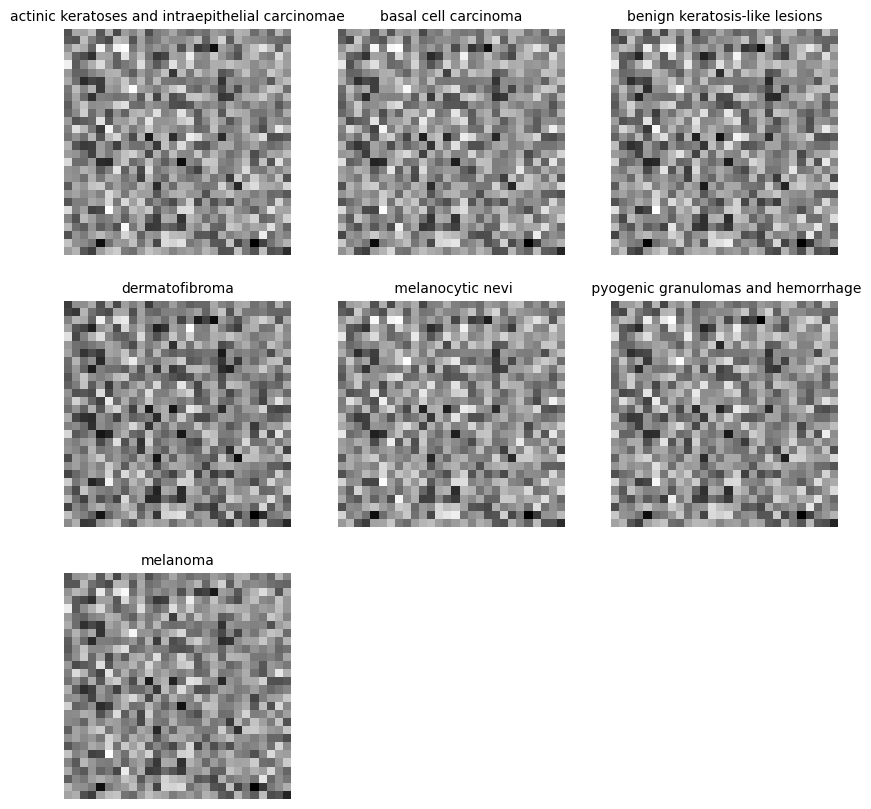

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score

x_train_augmented = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 1)
d_losses_real = []
d_losses_fake = []
g_losses = []

for epoch in range(epochs):
    # Generate synthetic images using the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    generated_images = generator.predict(noise)

    # Create augmented batches from the synthetic images
    batch = datagen.flow(generated_images, np.zeros(batch_size), batch_size=batch_size)

    # Train the discriminator on real samples
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    real_labels = np.ones((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)

    # Train the discriminator on synthetic samples
    fake_images, fake_labels = next(batch)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Calculate discriminator loss
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the GAN model to fool the discriminator
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan_model.train_on_batch(noise, valid_labels)

    real_labels_pred = discriminator.predict(real_images)
    real_accuracy = accuracy_score(np.ones_like(real_labels), real_labels_pred > 0.5)

    # Calculate accuracy on fake samples
    fake_labels_pred = discriminator.predict(fake_images)
    fake_accuracy = accuracy_score(np.zeros_like(fake_labels), fake_labels_pred > 0.5)

    # Print progress with accuracy
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}, Real Accuracy: {real_accuracy}, Fake Accuracy: {fake_accuracy}")

    # Save generated images at certain intervals
    if epoch % 1000 == 0:
        save_generated_images(epoch, generator)

    d_losses_real.append(d_loss_real[0])
    d_losses_fake.append(d_loss_fake[0])
    g_losses.append(g_loss)

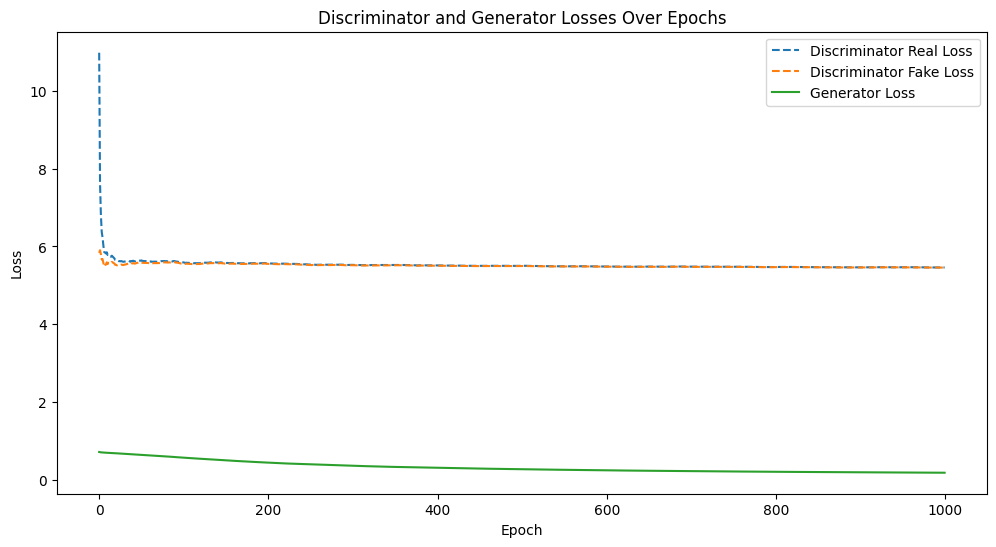

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(d_losses_real, label='Discriminator Real Loss', linestyle='--')
plt.plot(d_losses_fake, label='Discriminator Fake Loss', linestyle='--')
plt.plot(g_losses, label='Generator Loss')

plt.title('Discriminator and Generator Losses Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: list index out of range

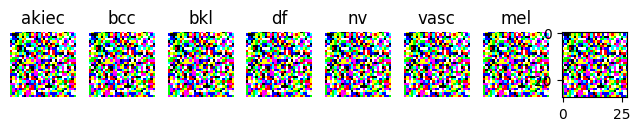

In [30]:
import matplotlib.pyplot as plt

# Function to generate and display images with class labels
def generate_and_display_images(generator, epoch, class_labels, examples=10, dim=(1, 10), figsize=(10, 2)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    # Rescale pixel values to the range [0, 1]
    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.title(class_labels[i])  # Add class label as title
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.show()

class_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
generate_and_display_images(generator, epochs-1, class_labels, examples=10, dim=(1, 10), figsize=(10, 2))